This notebook is aimed at cleaning data which will be used in incident predictions. The kaggle page from where I have taken the row datasets is https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_char = pd.read_csv(r"C:\Users\fedef\OneDrive\Desktop\DataScience\caracteristics.csv", encoding='latin-1', low_memory=False)
#r before your normal string it converts normal string to raw string
df_pl = pd.read_csv(r"C:\Users\fedef\OneDrive\Desktop\DATA_CAPSTONE\places.csv")
df_users = pd.read_csv(r"C:\Users\fedef\OneDrive\Desktop\DATA_CAPSTONE\users.csv")
df_veh = pd.read_csv(r"C:\Users\fedef\OneDrive\Desktop\DATA_CAPSTONE\vehicles.csv")
df_holi = pd.read_csv(r"C:\Users\fedef\OneDrive\Desktop\DATA_CAPSTONE\holidays.csv")

In [3]:
df_char.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [4]:
df_char.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


In [5]:
#dropping all the variable which are inaccurate, uneuseful for my study.
df_char.drop(['adr','gps'], axis=1, inplace=True) #do not run again!
df_char

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,0.0,0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,416.0,NaN,NaN,974
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,416.0,NaN,NaN,974
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,416.0,NaN,NaN,974
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,416.0,NaN,NaN,974


In [6]:
df_pl.columns

Index(['Num_Acc', 'catr', 'voie', 'v1', 'v2', 'circ', 'nbv', 'pr', 'pr1',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1'],
      dtype='object')

In [7]:
df_users.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')

In [8]:
df_veh.columns

Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')

In [9]:
df_holi.columns

Index(['ds', 'holiday'], dtype='object')

In [10]:
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape,df_pl.shape,df_users.shape,df_veh.shape,df_holi.shape)

(839985, 14) (839985, 12) (1876005, 12) (1433389, 2) (132, 2)


In [11]:
#renaming variables since they are in French
df_char.columns = ['ID', 'year', 'month', 'day', 'hhmm', 'light', 'agg', 'int', 'atm', 'col','con','lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df1 = df_char.merge(df_pl, how='inner',on='ID')
df1.head(5)

,ID,year,month,day,hhmm,light,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


I am keeping all the variables in the vehicles dataset.

users

In [12]:
df_users.head(5)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [13]:
df_users.drop(['trajet','locp','actp','etatp','num_veh'], axis=1, inplace = True)#variables i cannot explain and not deemed useful
df_users.columns = ['ID','place','catu','sex','sev', 'secu', 'year_birth']

In [14]:
df_users.head(5) #grav-->sev

,ID,place,catu,sex,sev,secu,year_birth
0,201600000001,1.0,1,1,2,11.0,1983.0
1,201600000001,1.0,1,3,1,21.0,2001.0
2,201600000002,1.0,1,3,1,11.0,1960.0
3,201600000002,2.0,2,3,1,11.0,2000.0
4,201600000002,3.0,2,3,2,11.0,1962.0


In [15]:
df_users.ID.value_counts().sort_index(ascending=True) #result:839985

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

In [16]:
"""using lamda (anonymous function)
catu
Catégorie d'usager :
 1 - Conducteur
2 - Passager
 3 - Piéton"""
df_users['ped'] = df_users['catu'].apply(lambda x:1 if x==3 else 0)
df_users.head(8)

,ID,place,catu,sex,sev,secu,year_birth,ped
0,201600000001,1.0,1,1,2,11.0,1983.0,0
1,201600000001,1.0,1,3,1,21.0,2001.0,0
2,201600000002,1.0,1,3,1,11.0,1960.0,0
3,201600000002,2.0,2,3,1,11.0,2000.0,0
4,201600000002,3.0,2,3,2,11.0,1962.0,0
5,201600000003,1.0,1,1,1,11.0,1997.0,0
6,201600000003,NaN,3,3,1,NaN,1970.0,1
7,201600000004,1.0,1,3,1,23.0,1999.0,0


In [17]:
df_users_sum = df_users.groupby('ID').sum()
print('Number of pedestrian involved per accident with relative frequency: ')
df_users_sum.ped.value_counts() #>5 are slaughters 

Number of pedestrian involved per accident with relative frequency: 


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
25         1
21         1
15         1
Name: ped, dtype: int64

In [23]:
#since we know that the first 4 digits of the ID represent the year of the accident
#first I isolate them
acc_year=df_users.ID.astype(str).str[:4]
age = acc_year.astype(int) - df_users['year_birth']
df_users['age'] = age
df_users.head()

,ID,place,catu,sex,sev,secu,year_birth,ped,age
0,201600000001,1.0,1,1,2,11.0,1983.0,0,33.0
1,201600000001,1.0,1,3,1,21.0,2001.0,0,15.0
2,201600000002,1.0,1,3,1,11.0,1960.0,0,56.0
3,201600000002,2.0,2,3,1,11.0,2000.0,0,16.0
4,201600000002,3.0,2,3,2,11.0,1962.0,0,54.0


In [37]:
#critical age
#df_userssum = df_users.groupby('ID').sum()
#df_userssum.age.value_counts() --> useful to plot a graph
df_users.age.mean()

37.313490644483984

In [42]:
#I consider now the age of deaths (severity=2)
df_deaths= df_users[df_users['sev']==2]
deaths = df_deaths['age'].value_counts()
deaths.sort_values(ascending=False)

20.0     17498
21.0     17458
22.0     16968
19.0     16136
23.0     15842
         ...  
105.0       11
104.0        4
101.0        3
102.0        3
103.0        3
Name: age, Length: 110, dtype: int64

In [45]:
total, sum1, i = deaths.values.sum(), 0, 0
for num in deaths.array:
    sum1 += num
    per = (sum1/total)*100
    if per<=50:
        i += 1
print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(per,total,i))


A  100.00 percent of a total of 616263 deaths is found on the 24 first ages, being the deaths array sorted by number of deaths.


In [46]:
"""According to the WHO (World Health Organization), the mortality rates for road traffic injuries per 100,000 population in France, 2008 was 7.5. Taking into account the mean of 64 millions of population (from 2005 to 2016) living in the country and supposing a fixed rate, which has been decreasing in the past years, there should be around 57k deaths from 2005 to 2016. So we can confirm the data is accurate."""

'According to the WHO (World Health Organization), the mortality rates for road traffic injuries per 100,000 population in France, 2008 was 7.5. Taking into account the mean of 64 millions of population (from 2005 to 2016) living in the country and supposing a fixed rate, which has been decreasing in the past years, there should be around 57k deaths from 2005 to 2016. So we can confirm the data is accurate.'

Text(0, 0.5, 'number of deaths')

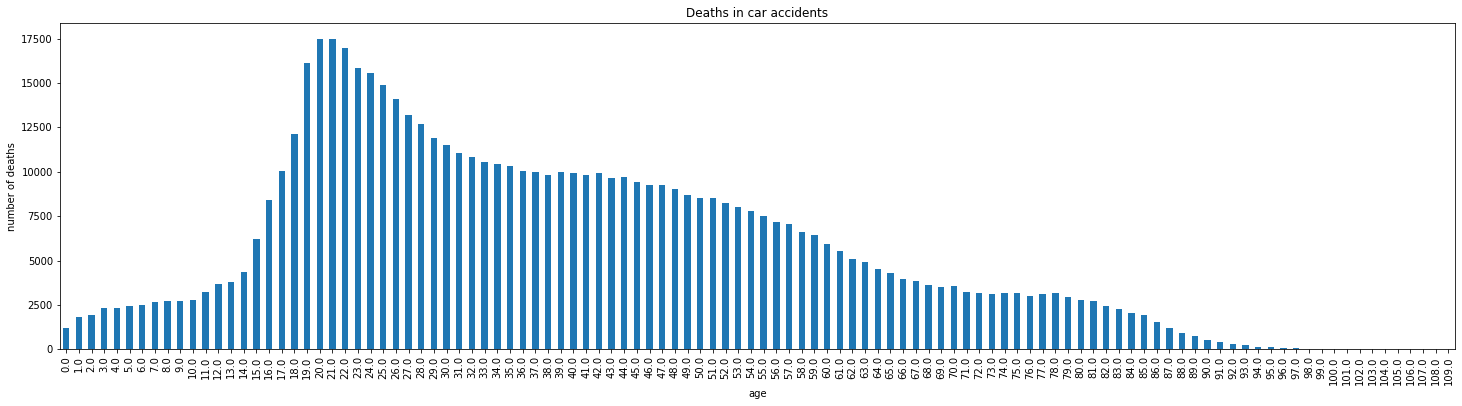

In [57]:
#visualizing number of deaths
pd.DataFrame(deaths)
deaths1 = deaths.sort_index()
deaths1.plot.bar(figsize = (25,6))

plt.title('Deaths in car accidents')
plt.xlabel('age')
plt.ylabel('number of deaths')

In [55]:
age.mode()

0    20.0
dtype: float64

People older than  0 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


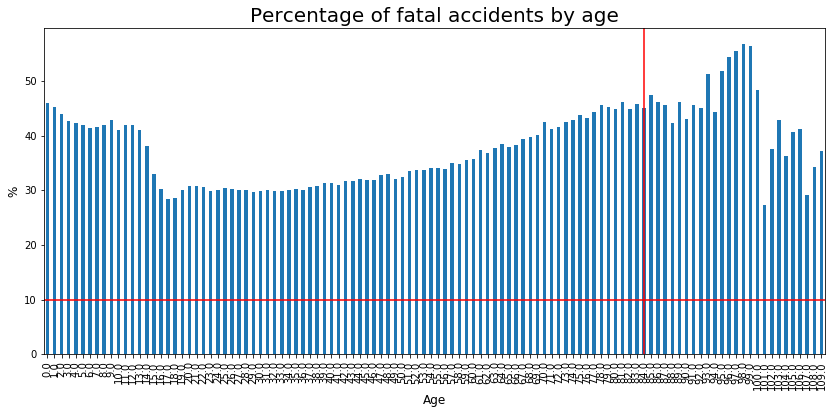

In [59]:
#dead age

death = df_deaths['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))

In [60]:

df_users['crit_age'] = df_users['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_users['dead_age'] = df_users['age'].apply(lambda x: 1 if x>84 else 0)

df_users.head(5)

,ID,place,catu,sex,sev,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1.0,1,1,2,11.0,1983.0,0,33.0,0,0
1,201600000001,1.0,1,3,1,21.0,2001.0,0,15.0,0,0
2,201600000002,1.0,1,3,1,11.0,1960.0,0,56.0,0,0
3,201600000002,2.0,2,3,1,11.0,2000.0,0,16.0,0,0
4,201600000002,3.0,2,3,2,11.0,1962.0,0,54.0,0,0


In order to use the features created with the other features found in the gerenal data frame (df) from the vehicles and characteristics data, they should have same number of rows. Thus, the users data set will be goruped by accident ID.

In [65]:
df2 = df_users.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)

num_users = df_users.ID.value_counts().sort_index(ascending=True)

df2['num_us'] = num_users
df2

,place,catu,sex,sev,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,,,
200500000001,16.0,10,11,8,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2.0,2,4,2,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2.0,2,4,2,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5.0,5,14,6,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3.0,3,7,2,22.0,3939.0,0,71.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201600059428,1.0,4,5,2,21.0,3994.0,1,38.0,1,0,1,0,1,2
201600059429,1.0,1,4,1,21.0,1984.0,0,32.0,0,0,0,0,0,1
201600059430,2.0,2,5,2,32.0,3972.0,0,60.0,1,0,1,0,0,2


Last feature is the severity from the gravity feature of the users dataset. Currently it consists of 4 labels:

Unscathed
Dead
Hospitalized Wonded
Light Injury
My idea is to simplify it to two labels and sort them by gravity, giving 0 to all cases of unscathed or light injury and 1 to all cases of dead or hospitalized users. \ Then the severity of each accident will be equal to the maximum gravity of any of the users.

In [67]:
def change_sev(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'sev']].copy()
df3['sev'] = df_users['sev'].apply(change_sev)
df3.sort_values(by='ID')

,ID,sev
1678507,200500000001,0
1678512,200500000001,1
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [68]:
severity = df3[['sev', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,sev
ID,
200500000001,1
200500000002,0
200500000003,0
200500000004,1
200500000005,0
...,...
201600059428,0
201600059429,0
201600059430,0


In [69]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,place,catu,sex,sev,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
0,200500000001,16.0,10,11,1,86.0,11901.0,0,129.0,1,0,1,0,0,6
1,200500000002,2.0,2,4,0,32.0,3934.0,0,76.0,1,0,1,0,0,2
2,200500000003,2.0,2,4,0,42.0,3939.0,0,71.0,1,0,1,0,0,2
3,200500000004,5.0,5,14,1,44.0,7779.0,0,241.0,0,1,0,1,0,4
4,200500000005,3.0,3,7,0,22.0,3939.0,0,71.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,201600059428,1.0,4,5,0,21.0,3994.0,1,38.0,1,0,1,0,1,2
839981,201600059429,1.0,1,4,0,21.0,1984.0,0,32.0,0,0,0,0,0,1
839982,201600059430,2.0,2,5,0,32.0,3972.0,0,60.0,1,0,1,0,0,2
839983,201600059431,2.0,2,8,0,42.0,3984.0,0,48.0,2,0,1,0,0,2


In [77]:
#Now it's time to join the las 4 features of df2 with the other features
print('Both data frames having same number of rows is an indicator that any accident has been left behind')
df1.shape, df2.shape

Both data frames having same number of rows is an indicator that any accident has been left behind


((839985, 25), (839985, 15))

In [78]:
df1 = df1.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df1
#From the date and time of the accident I am just going to differenciate if the accident occurred during holidays or weekends.

,ID,year,month,day,hhmm,light,agg,int,atm,col,...,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,0.0,3.0,99.0,1,1,0,2,0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,2,1
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,3,1
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1.0,1.0,0.0,1.0,0.0,0,0,0,3,0


In [80]:
#Datetime

from datetime import datetime 

dt = df1[['ID','year', 'month', 'day', 'hhmm' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head(5)

,ID,year,month,day,hhmm,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [81]:
df = df1.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()
#The precision of time is reduced to hours.

,ID,hhmm,light,agg,int,atm,col,con,lat,long,...,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,5.0,0.0,0,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,5.0,0.0,0,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,11.0,0.0,0,...,3.0,99.0,1,1,0,2,0,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,477.0,0.0,0,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,11.0,0.0,0,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [83]:
df['time'] = df.hhmm.div(100).apply(np.floor)

In [84]:

df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')